# Random Forest

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# fixing the randomness
import random
random.seed(42)
np.random.seed(42)

To start, we will create our data. We are looking at the random forest classifier, so we'll use the cancer dataset, used for classification. 

In [38]:
# Import the diabetes dataset from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.datasets import load_breast_cancer
# load the dataset
cancer = load_breast_cancer()
print(cancer['feature_names'])
cancer.data.shape

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


(569, 30)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,  test_size = 0.3, random_state = 42)

Creating a Random Forest classifier with sk-learn is not different than using other type of classifier, such as the Decision Tree we saw last time

In [34]:
# importing the random forest classifier algorithm function from sklearn
from sklearn.ensemble import RandomForestClassifier
# the random forest is stochastic, so we use a random_state parameter to fix the result
clf = RandomForestClassifier(random_state=42)

And we use the same method for training than we usually do

In [35]:
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9707602339181286

## Part II


The `max_features` parameter can be set manually with an integer for an hard value or a float for percentage, or you can use some preset value such as `'sqrt'` which consider $\sqrt{N}$ features for each split, with $N$ being the number of features. 

The square root is the same as `'auto'` for the ramdom forest classifier, and is the default parameter.

In [42]:
clf2 = RandomForestClassifier(max_features=30, random_state=42)

In [43]:
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

0.9590643274853801

By default the `max_depth` parameter doesn't have any value, and such the nodes are expanded until the leaves are pure (or until other hyper-parameter such as `min_samples_split` decides it).

The sk-learn user guide mention this:
> Good results are often achieved when setting `max_depth=None` in combination with `min_samples_split=2` (i.e., when fully developing the trees).

However, you can still set a maximum depth by hand, with an integer. Doing so will help reducing the size of the model.

In [46]:
clf3 = RandomForestClassifier(max_depth=3, random_state=42)

In [47]:
clf3.fit(x_train, y_train)
clf3.score(x_test, y_test)

0.9707602339181286

The number of trees is also an important parameter. You can changed it with the `n_estimators` argument. 

User guide:
> The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. 

The default value is 100, but you can change it for another integer.

In [58]:
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
clf4.fit(x_train, y_train)
clf4.score(x_test, y_test)

0.9707602339181286

In [60]:
clf5 = RandomForestClassifier(n_estimators=3000, random_state=42)

In [61]:
clf5.fit(x_train, y_train)
clf5.score(x_test, y_test)

0.9707602339181286

You can decide to use bootstrapping or the entire dataset for each tree with the `bootstrap` argument. The default value is `True`. 

If it is `True`, you can control the size of the bagging with the `max_samples` argument. By default it is `None`, which draws all the sample. You can change it to an int or a float for percentage. 

User guide:
> A typical value of subsample is 0.5.

In [62]:
clf6 = RandomForestClassifier(max_samples=1, random_state=42)

In [63]:
clf6.fit(x_train, y_train)
clf6.score(x_test, y_test)

0.631578947368421

In [64]:
clf7 = RandomForestClassifier(max_samples=0.4, random_state=42)

In [65]:
clf7.fit(x_train, y_train)
clf7.score(x_test, y_test)

0.9707602339181286

## Part III

In [66]:
# Import the diabetes dataset from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
from sklearn.datasets import load_diabetes
# load the dataset
diabetes = load_diabetes()
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [67]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    diabetes.data, diabetes.target,  test_size = 0.3, random_state = 42)

In [68]:
# importing the random forest regressor algorithm function from sklearn
from sklearn.ensemble import RandomForestRegressor
# the random forest is stochastic, so we use a random_state parameter to fix the result
reg = RandomForestRegressor(random_state=42)

In [69]:
reg.fit(x_train2, y_train2)
reg.score(x_test2, y_test2)

0.4696720656194817

Using all the argument we observed previously, we can set custom parameter for our regressor. 

Note that some default parameter value are different between the regressor and the classifier. For example the `max_features` default value `'auto'` is equal to the number of features rather than its square root. 

In [70]:
reg2 = RandomForestRegressor(
    random_state=42, n_estimators=100, max_samples=0.5, 
    max_features='sqrt', max_depth=15)

In [71]:
reg2.fit(x_train2, y_train2)
reg2.score(x_test2, y_test2)

0.5148155721944819

## PART IV

In [72]:
clfm = RandomForestClassifier(
    random_state=42, n_estimators=100, max_samples=0.5, 
    max_features='sqrt', max_depth=15)

In [73]:
clfm.fit(x_train, y_train)
res_p = clfm.predict_proba(x_test)
res = clfm.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, \
    recall_score, precision_score, ConfusionMatrixDisplay, RocCurveDisplay
print('acc:', accuracy_score(y_test, res))
print('ppv:', precision_score(y_test, res))
print('tpr:', recall_score(y_test, res))
print('f1 :', f1_score(y_test, res))
print('auc :', roc_auc_score(y_test, res_p[:, 1]))

acc: 0.9707602339181286
ppv: 0.963963963963964
tpr: 0.9907407407407407
f1 : 0.9771689497716894
auc : 0.9973544973544973


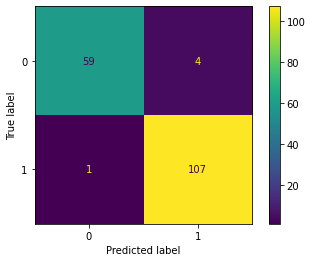

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, res)

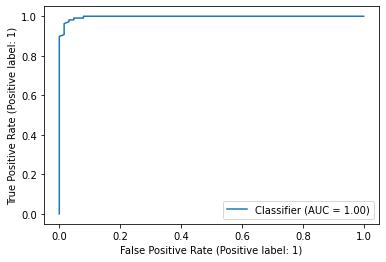

In [29]:
RocCurveDisplay.from_predictions(y_test, res_p[:, 1])